In [56]:
# Import necessary libraries
import pandas as pd
import logging
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [57]:
# Loading dataset
train = pd.read_csv("/kaggle/input/brist1d/train.csv", low_memory=False)
test = pd.read_csv("/kaggle/input/brist1d/test.csv", low_memory=False)
sample = pd.read_csv("/kaggle/input/brist1d/sample_submission.csv", low_memory=False)

In [58]:
train.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Columns: 508 entries, id to bg+1:00
dtypes: float64(433), object(75)
memory usage: 686.1+ MB


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Columns: 507 entries, id to activity-0:00
dtypes: float64(432), object(75)
memory usage: 14.1+ MB


In [61]:

# Assuming train is a DataFrame
mapping_dict = {p: idx for idx, p in enumerate(train['p_num'].unique())}

# Map p_num and process time directly
train['p_num'] = train['p_num'].map(mapping_dict)
train['time'] = pd.to_datetime(train['time'], format='%H:%M:%S')
train['hour'] = train['time'].dt.hour
train['minute'] = train['time'].dt.minute
train.drop('time', axis=1, inplace=True)

# Drop the 'id' column if it exists
if 'id' in train.columns:
    train.drop(columns=['id'], inplace=True)

# Output the processed DataFrame for verification
train.head()


,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,hour,minute
0,0,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,6,10
1,0,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,6,25
2,0,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,8.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,6,40
3,0,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,6,55
4,0,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,7,10


In [62]:
import pandas as pd

# Assuming train is a DataFrame
mapping_dict = {p: idx for idx, p in enumerate(test['p_num'].unique())}

# Map p_num and process time directly
test['p_num'] = test['p_num'].map(mapping_dict)
test['time'] = pd.to_datetime(test['time'], format='%H:%M:%S')
test['hour'] = test['time'].dt.hour
test['minute'] = test['time'].dt.minute
test.drop('time', axis=1, inplace=True)

if 'id' in test.columns:
    test.drop(columns=['id'], inplace=True)


In [63]:
train.sample(5)

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,hour,minute
171822,8,4.8,4.9,5.0,5.0,5.1,5.3,5.7,6.2,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.3,22,35
19817,1,8.2,8.2,8.2,8.5,9.2,9.9,10.6,11.1,11.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,5,35
81535,3,7.9,8.2,8.3,8.4,8.5,8.7,8.7,8.6,8.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.9,17,15
15506,1,7.0,7.6,8.1,8.2,8.2,7.9,7.3,6.9,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.4,4,10
106835,6,4.9,4.9,4.9,4.9,5.0,5.1,5.2,5.2,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.8,7,25


In [64]:
import pandas as pd

def drop_columns_with_high_nan(df, threshold=0.5):
    """
    Drops columns from the DataFrame if they have more than a specified
    percentage of missing values.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        threshold (float): The percentage threshold for missing values (default is 0.5 for 50%).

    Returns:
        pd.DataFrame: The DataFrame with columns having more than `threshold`% missing values dropped.
    """
    # Calculate the threshold count for each column
    missing_threshold = len(df) * threshold
    
    # Drop columns with more missing values than the threshold
    return df.dropna(thresh=len(df) - missing_threshold, axis=1)



In [65]:
train_data_cleaned = drop_columns_with_high_nan(train, threshold=0.5)
test_data_cleaned = drop_columns_with_high_nan(test, threshold=0.5)

In [66]:
print("Updated df_train:",train_data_cleaned.shape)
print("Updated df_test:",test_data_cleaned.shape)

Updated df_train: (177024, 292)
Updated df_test: (3644, 291)


In [67]:
def check_missing_values(df):
    return pd.DataFrame({
        'Missing Values': df.isna().sum(),
        'Percentage (%)': (df.isna().mean() * 100)
    })

In [68]:
missing_info = check_missing_values(train_data_cleaned)
print(missing_info)

           Missing Values  Percentage (%)
p_num                   0        0.000000
bg-5:55             27254       15.395653
bg-5:50             18491       10.445476
bg-5:45             13660        7.716468
bg-5:40             27258       15.397912
...                   ...             ...
cals-0:05           35263       19.919898
cals-0:00           35257       19.916508
bg+1:00                 0        0.000000
hour                    0        0.000000
minute                  0        0.000000

[292 rows x 2 columns]


In [69]:
missing_info = check_missing_values(test_data_cleaned)
print(missing_info)

           Missing Values  Percentage (%)
p_num                   0        0.000000
bg-5:55               984       27.003293
bg-5:50               583       15.998902
bg-5:45               486       13.336992
bg-5:40               986       27.058178
...                   ...             ...
cals-0:10             525       14.407245
cals-0:05             529       14.517014
cals-0:00             522       14.324918
hour                    0        0.000000
minute                  0        0.000000

[291 rows x 2 columns]


In [70]:
def check_same_columns(train_df, test_df):
    """
    Checks if train and test DataFrames have the same columns.
    
    Parameters:
        train_df (pd.DataFrame): Training DataFrame.
        test_df (pd.DataFrame): Testing DataFrame.
        
    Returns:
        bool: True if both DataFrames have the same columns, False otherwise.
        list: List of columns not in both DataFrames.
    """
    # Get columns present in each DataFrame
    train_columns = set(train_df.columns)
    test_columns = set(test_df.columns)
    
    # Find columns that are not common in both
    missing_in_train = test_columns - train_columns
    missing_in_test = train_columns - test_columns
    
    # Check if both sets of columns are equal
    if train_columns == test_columns:
        print("Train and test DataFrames have the same columns.")
        return True, []
    else:
        print("Train and test DataFrames do not have the same columns.")
        print("Columns missing in train:", missing_in_train)
        print("Columns missing in test:", missing_in_test)
        return False, list(missing_in_train | missing_in_test)

In [71]:
# Check columns
same_columns, diff_columns = check_same_columns(train_data_cleaned, test_data_cleaned)
print("\nColumns that differ:", diff_columns)

Train and test DataFrames do not have the same columns.
Columns missing in train: set()
Columns missing in test: {'bg+1:00'}

Columns that differ: ['bg+1:00']


In [72]:
import pandas as pd

def reduce_memory_usage(df):
    """
    Reduces memory usage of a DataFrame by downcasting numerical columns
    and converting object columns to categorical where possible.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        
    Returns:
        pd.DataFrame: DataFrame with optimized memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2  # Memory usage in MB
    print(f"Initial memory usage of DataFrame: {start_mem:.2f} MB")

    # Iterate over each column to reduce memory usage
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif col_type == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
        elif col_type == 'object' and df[col].nunique() < 0.5 * len(df):
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2  # Memory usage after optimization
    print(f"Reduced memory usage of DataFrame: {end_mem:.2f} MB ({100 * (start_mem - end_mem) / start_mem:.2f}% reduction)")
    
    return df


In [73]:
# Assuming your data is in train_cleaned and test_cleaned
train_cleaned = reduce_memory_usage(train_data_cleaned)
test_cleaned = reduce_memory_usage(test_data_cleaned)


Initial memory usage of DataFrame: 393.02 MB
Reduced memory usage of DataFrame: 196.68 MB (49.96% reduction)
Initial memory usage of DataFrame: 8.06 MB
Reduced memory usage of DataFrame: 4.03 MB (49.96% reduction)


In [74]:
from sklearn.impute import SimpleImputer
import pandas as pd

def custom_imputation(df):
    """
    Impute missing values using mean for specific columns and a constant value for others.
    
    Columns starting with "bg-" and "hr" will be imputed with their mean.
    Columns starting with "cals", "insulin", "carbs", and "steps" will be imputed with 0.
    
    Parameters:
        df (pd.DataFrame): The DataFrame with missing values.
        
    Returns:
        pd.DataFrame: DataFrame with missing values imputed as specified.
    """
    
    # Identify columns based on prefixes for mean and constant imputations
    mean_columns = [col for col in df.columns if col.startswith(('bg-', 'hr'))]
    constant_columns = [col for col in df.columns if col.startswith(('cals', 'insulin', 'carbs', 'steps'))]
    

    # Impute mean for specified columns
    if mean_columns:
        mean_imputer = SimpleImputer(strategy='mean')
        df[mean_columns] = mean_imputer.fit_transform(df[mean_columns])
    
    # Impute constant 0 for specified columns
    if constant_columns:
        constant_imputer = SimpleImputer(strategy='constant', fill_value=0)
        df[constant_columns] = constant_imputer.fit_transform(df[constant_columns])
    
    
    return df


In [75]:
# Apply custom imputation to train and test DataFrames
train_imputed = custom_imputation(train_cleaned)
test_imputed = custom_imputation(test_cleaned)




In [76]:
# Optionally print or inspect the results
print("Custom Imputed Train DataFrame:")
train_imputed.head()


Custom Imputed Train DataFrame:


,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00,hour,minute
0,0,8.211019,8.23045,9.6,8.210987,8.229649,9.7,8.211048,8.228889,9.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.4,6,10
1,0,8.211019,8.23045,9.7,8.210987,8.229649,9.2,8.211048,8.228889,8.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.8,6,25
2,0,8.211019,8.23045,9.2,8.210987,8.229649,8.7,8.211048,8.228889,8.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5,6,40
3,0,8.211019,8.23045,8.7,8.210987,8.229649,8.4,8.211048,8.228889,8.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.8,6,55
4,0,8.211019,8.23045,8.4,8.210987,8.229649,8.1,8.211048,8.228889,8.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.7,7,10


In [77]:
print("\nCustom Imputed Test DataFrame:")
test_imputed.head()


Custom Imputed Test DataFrame:


,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,hour,minute
0,0,8.566653,9.20000,8.715389,8.563845,10.200000,8.692142,8.546102,10.300000,8.700377,...,4.90,4.80,4.800000,4.800000,4.800000,4.80,4.90,6.06,6,45
1,0,8.566653,8.68886,9.900000,8.563845,8.666799,9.400000,8.546102,8.654162,9.100000,...,9.70,13.92,16.219999,16.690001,23.120001,30.51,24.57,32.43,11,25
2,0,8.566653,5.50000,8.715389,8.563845,5.500000,8.692142,8.546102,5.200000,8.700377,...,9.98,25.24,12.270000,6.830000,6.530000,7.97,19.76,10.16,14,45
3,0,8.566653,3.40000,8.715389,8.563845,3.900000,8.692142,8.546102,4.700000,8.700377,...,4.80,5.00,4.900000,4.900000,4.800000,4.80,4.90,4.80,4,30
4,0,8.566653,8.68886,8.300000,8.563845,8.666799,10.000000,8.546102,8.654162,12.200000,...,4.80,4.80,4.900000,4.800000,4.800000,4.80,4.80,4.80,4,20


In [78]:
train_imputed.isnull().sum()

p_num        0
bg-5:55      0
bg-5:50      0
bg-5:45      0
bg-5:40      0
            ..
cals-0:05    0
cals-0:00    0
bg+1:00      0
hour         0
minute       0
Length: 292, dtype: int64

In [79]:
test_imputed.isnull().sum()

p_num        0
bg-5:55      0
bg-5:50      0
bg-5:45      0
bg-5:40      0
            ..
cals-0:10    0
cals-0:05    0
cals-0:00    0
hour         0
minute       0
Length: 291, dtype: int64

In [80]:
X = train_imputed.drop('bg+1:00', axis=1)
y = train_imputed['bg+1:00']

In [81]:
X_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [82]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



# Initialize and train the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Retrieve feature importance scores
importance_types = ['weight', 'gain', 'cover']
feature_importances = {}

for importance_type in importance_types:
    feature_importances[importance_type] = model.get_booster().get_score(importance_type=importance_type)

# Convert to DataFrame for easier viewing
importance_df = pd.DataFrame(feature_importances).fillna(0)
importance_df['Feature'] = X_train.columns
importance_df = importance_df.set_index('Feature')

# Sort features by one of the importance metrics (e.g., 'gain')
sorted_features = importance_df.sort_values(by='gain', ascending=False)

# Set a threshold to select features
threshold = 80
selected_features = sorted_features[sorted_features['gain'] > threshold]

# Display selected features
print("Selected Features from XGBoost Importance:")
print(selected_features)




Selected Features from XGBoost Importance:
              weight         gain         cover
Feature                                        
bg-0:00        189.0  6602.238281  45658.386719
bg-0:15         86.0   454.314728  23071.791016
bg-0:05         68.0   344.140198  24545.587891
bg-0:30         42.0   277.840332  10410.595703
hr-0:00         52.0   262.542297  20951.865234
...              ...          ...           ...
bg-1:15         30.0    81.728165   7224.033203
hr-5:55         22.0    80.875481  15429.818359
bg-3:55         18.0    80.526672  13973.444336
bg-2:25         26.0    80.447113  10299.654297
insulin-5:00    16.0    80.386993  26573.875000

[95 rows x 3 columns]


In [83]:
# Filter the train and validation sets to use only selected features
X_train_selected = X_train[selected_features.index]
x_val_selected = x_val[selected_features.index]

In [84]:
print(X_train_selected.columns)


Index(['bg-0:00', 'bg-0:15', 'bg-0:05', 'bg-0:30', 'hr-0:00', 'p_num',
       'bg-0:20', 'hour', 'insulin-0:25', 'cals-5:05', 'bg-0:50', 'bg-0:10',
       'insulin-0:35', 'insulin-0:30', 'bg-1:45', 'bg-4:55', 'hr-1:15',
       'bg-5:25', 'insulin-1:20', 'insulin-0:20', 'bg-3:10', 'insulin-0:15',
       'cals-1:00', 'bg-2:35', 'bg-3:25', 'insulin-0:10', 'insulin-5:30',
       'bg-1:10', 'insulin-5:25', 'bg-1:20', 'insulin-0:00', 'insulin-0:05',
       'insulin-4:45', 'insulin-0:45', 'hr-0:15', 'hr-0:10', 'cals-0:05',
       'insulin-0:40', 'cals-3:20', 'cals-1:25', 'hr-0:05', 'cals-1:15',
       'bg-2:50', 'hr-0:55', 'insulin-1:00', 'bg-3:15', 'hr-4:50', 'bg-1:50',
       'bg-2:00', 'cals-5:50', 'bg-4:50', 'bg-2:15', 'bg-5:15', 'cals-4:55',
       'insulin-1:15', 'cals-0:20', 'bg-1:35', 'bg-0:45', 'cals-5:00',
       'hr-0:45', 'bg-1:55', 'insulin-5:50', 'bg-2:40', 'hr-2:05',
       'insulin-0:50', 'bg-4:10', 'bg-3:05', 'insulin-1:40', 'cals-0:00',
       'bg-1:00', 'cals-4:20', 'hr-5:5

In [85]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import QuantileTransformer


# Define the column groups based on prefix matching
def select_columns_by_prefix(df, prefix):
    """
    Select columns from the DataFrame that start with a given prefix.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to search in.
        prefix (str): The prefix to match column names.
        
    Returns:
        selected_columns (pd.DataFrame): The DataFrame containing only selected columns.
    """
    selected_columns = df.loc[:, df.columns.str.startswith(prefix)]
    return selected_columns

In [86]:
# Apply column selection based on prefixes
bg_train = select_columns_by_prefix(X_train_selected, "bg-")
bg_val = select_columns_by_prefix(x_val_selected, "bg-")


insulin_train = select_columns_by_prefix(X_train_selected, "insulin-")
insulin_val = select_columns_by_prefix(x_val_selected, "insulin-")

hr_train = select_columns_by_prefix(X_train_selected, "hr-")
hr_val = select_columns_by_prefix(x_val_selected, "hr-")


cals_train = select_columns_by_prefix(X_train_selected, "cals-")
cals_val = select_columns_by_prefix(x_val_selected, "cals-")

carbs_train = select_columns_by_prefix(X_train_selected, "carbs-")
carbs_val = select_columns_by_prefix(x_val_selected, "carbs-")


# Convert each DataFrame to numpy arrays
bg_train = bg_train.to_numpy()
bg_val = bg_val.to_numpy()

insulin_train = insulin_train.to_numpy()
insulin_val = insulin_val.to_numpy()

hr_train = hr_train.to_numpy()
hr_val = hr_val.to_numpy()


cals_train = cals_train.to_numpy()
cals_val = cals_val.to_numpy()

carbs_train = carbs_train.to_numpy()
carbs_val = carbs_val.to_numpy()




In [87]:
print("bg_train shape:", bg_train.shape)
print("insulin_train shape:", insulin_train.shape)
print("hr_train shape:", hr_train.shape)
print("cals_train shape:", cals_train.shape)

print("bg_val shape:", bg_val.shape)
print("insulin_val shape:", insulin_val.shape)
print("hr_val shape:", hr_val.shape)
print("cals_val shape:", cals_val.shape)


bg_train shape: (141619, 34)
insulin_train shape: (141619, 27)
hr_train shape: (141619, 14)
cals_train shape: (141619, 18)
bg_val shape: (35405, 34)
insulin_val shape: (35405, 27)
hr_val shape: (35405, 14)
cals_val shape: (35405, 18)


In [88]:
from sklearn.preprocessing import QuantileTransformer
import numpy as np

# Create separate transformers for each feature group
bg_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
insulin_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
hr_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
cals_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

# Fit and transform each feature group for training data
bg_train = bg_transformer.fit_transform(bg_train)
insulin_train = insulin_transformer.fit_transform(insulin_train)
hr_train = hr_transformer.fit_transform(hr_train)
cals_train = cals_transformer.fit_transform(cals_train)

# Transform each feature group for validation data
bg_val = bg_transformer.transform(bg_val)
insulin_val = insulin_transformer.transform(insulin_val)
hr_val = hr_transformer.transform(hr_val)
cals_val = cals_transformer.transform(cals_val)

# Concatenate all transformed features for training and validation data
X_train = np.concatenate([bg_train, insulin_train, hr_train, cals_train], axis=1)
X_val = np.concatenate([bg_val, insulin_val, hr_val, cals_val], axis=1)

# Now X_train and X_val are ready to be used for training and validation
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)


Shape of X_train: (141619, 93)
Shape of X_val: (35405, 93)


[0]	validation_0-rmse:2.56180	validation_1-rmse:2.58190
[1000]	validation_0-rmse:0.73274	validation_1-rmse:1.60356
[2000]	validation_0-rmse:0.39607	validation_1-rmse:1.54833
[3000]	validation_0-rmse:0.23769	validation_1-rmse:1.52767
[4000]	validation_0-rmse:0.14935	validation_1-rmse:1.51827
[5000]	validation_0-rmse:0.09783	validation_1-rmse:1.51390
[6000]	validation_0-rmse:0.06554	validation_1-rmse:1.51147
[7000]	validation_0-rmse:0.04564	validation_1-rmse:1.51015
[8000]	validation_0-rmse:0.03210	validation_1-rmse:1.50947
[9000]	validation_0-rmse:0.02282	validation_1-rmse:1.50912
[9999]	validation_0-rmse:0.01625	validation_1-rmse:1.50891
XGBoost RMSE on validation set: 1.5089


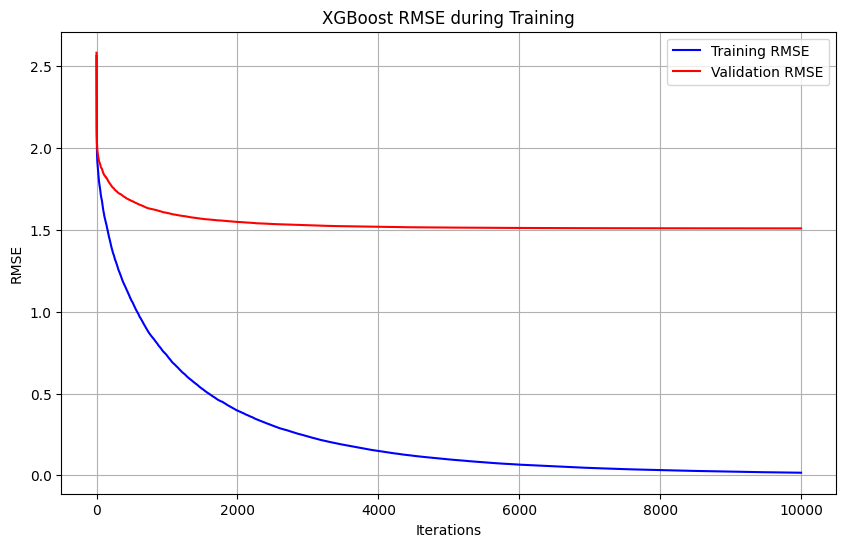

In [89]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
# Create the XGBoost model with GPU support using the updated parameter setting
xgb_model = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=10000,
    random_state=42,
    device='cuda',  # Use GPU
    tree_method='hist'  # This is the updated tree method for GPU support
)



# Create eval set for XGBoost
evals = [(X_train, y_train), (X_val, y_val)]

# Fit the model with evaluation during training
xgb_model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=evals, 
    verbose=1000  # Output evaluation every 100 iterations
)

# Make predictions on validation set
y_pred = xgb_model.predict(X_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"XGBoost RMSE on validation set: {rmse:.4f}")

# Plot the evaluation metrics
# Retrieve training and validation RMSE
results = xgb_model.evals_result()
epochs = len(results['validation_0']['rmse'])
training_rmse = results['validation_0']['rmse']
validation_rmse = results['validation_1']['rmse']

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), training_rmse, label="Training RMSE", color='blue')
plt.plot(range(epochs), validation_rmse, label="Validation RMSE", color='red')
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.title("XGBoost RMSE during Training")
plt.legend()
plt.grid(True)
plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt

[CV 3/3; 1/10] START colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=2000, subsample=1.0
[0]	validation_0-rmse:2.91512	validation_1-rmse:2.93341
[CV 2/3; 1/10] START colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=2000, subsample=1.0
[0]	validation_0-rmse:2.91546	validation_1-rmse:2.93366
[CV 1/3; 1/10] START colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=2000, subsample=1.0
[0]	validation_0-rmse:2.91580	validation_1-rmse:2.93420


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/3; 2/10] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=500, subsample=1.0
[0]	validation_0-rmse:2.91785	validation_1-rmse:2.93247
[499]	validation_0-rmse:1.78501	validation_1-rmse:1.90170


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:57:43] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in

[CV 1/3; 2/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=500, subsample=1.0;, score=-3.448 total time=  22.5s
[CV 2/3; 2/10] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=500, subsample=1.0
[0]	validation_0-rmse:2.91796	validation_1-rmse:2.93247
[499]	validation_0-rmse:1.78497	validation_1-rmse:1.89942


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/3; 2/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=500, subsample=1.0;, score=-3.538 total time=  21.2s
[CV 3/3; 2/10] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=500, subsample=1.0
[0]	validation_0-rmse:2.91752	validation_1-rmse:2.93182
[1000]	validation_0-rmse:0.97558	validation_1-rmse:1.59440
[1000]	validation_0-rmse:0.98596	validation_1-rmse:1.59206
[1000]	validation_0-rmse:0.99142	validation_1-rmse:1.59903
[1156]	validation_0-rmse:0.97181	validation_1-rmse:1.58574
[499]	validation_0-rmse:1.78734	validation_1-rmse:1.90513
[1132]	validation_0-rmse:0.97454	validation_1-rmse:1.59090
[1173]	validation_0-rmse:0.95404	validation_1-rmse:1.58491


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:58:24] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:58:25] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for boo

[CV 3/3; 1/10] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=2000, subsample=1.0;, score=-2.469 total time= 1.1min
[CV 2/3; 3/10] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=2000, subsample=0.6
[0]	validation_0-rmse:2.97833	validation_1-rmse:2.99235
[CV 3/3; 2/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=500, subsample=1.0;, score=-3.568 total time=  20.2s
[CV 1/3; 3/10] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=2000, subsample=0.6
[0]	validation_0-rmse:2.97833	validation_1-rmse:2.99241


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/3; 1/10] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=2000, subsample=1.0;, score=-2.381 total time= 1.1min
[CV 1/3; 4/10] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=2000, subsample=0.8
[0]	validation_0-rmse:2.97930	validation_1-rmse:2.99330


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/3; 1/10] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=2000, subsample=1.0;, score=-2.474 total time= 1.1min
[CV 3/3; 3/10] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=2000, subsample=0.6
[0]	validation_0-rmse:2.97830	validation_1-rmse:2.99233
[1000]	validation_0-rmse:2.00090	validation_1-rmse:2.03891
[1000]	validation_0-rmse:1.88174	validation_1-rmse:1.95334
[1000]	validation_0-rmse:1.88483	validation_1-rmse:1.95281
[1000]	validation_0-rmse:1.88306	validation_1-rmse:1.95252
[1999]	validation_0-rmse:1.95056	validation_1-rmse:1.99846
[1999]	validation_0-rmse:1.80457	validation_1-rmse:1.90500
[1999]	validation_0-rmse:1.80164	validation_1-rmse:1.90580


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/3; 4/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=2000, subsample=0.8;, score=-3.807 total time=  41.6s
[CV 2/3; 4/10] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=2000, subsample=0.8
[0]	validation_0-rmse:2.97937	validation_1-rmse:2.99333
[1999]	validation_0-rmse:1.80480	validation_1-rmse:1.90648


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/3; 3/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=2000, subsample=0.6;, score=-3.557 total time=  45.4s
[CV 3/3; 4/10] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=2000, subsample=0.8
[0]	validation_0-rmse:2.97928	validation_1-rmse:2.99326
[1000]	validation_0-rmse:2.00098	validation_1-rmse:2.03839
[CV 1/3; 3/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=2000, subsample=0.6;, score=-3.457 total time=  46.1s
[CV 1/3; 5/10] START colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=1000, subsample=0.8
[0]	validation_0-rmse:2.85405	validation_1-rmse:2.86930


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 3/3; 3/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=2000, subsample=0.6;, score=-3.582 total time=  45.8s
[CV 2/3; 5/10] START colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=1000, subsample=0.8
[0]	validation_0-rmse:2.85468	validation_1-rmse:2.86949
[1000]	validation_0-rmse:2.00068	validation_1-rmse:2.03769
[1999]	validation_0-rmse:1.95110	validation_1-rmse:1.99809
[999]	validation_0-rmse:1.80408	validation_1-rmse:1.90632
[999]	validation_0-rmse:1.80516	validation_1-rmse:1.90537
[1999]	validation_0-rmse:1.95148	validation_1-rmse:1.99865


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/3; 4/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=2000, subsample=0.8;, score=-3.910 total time=  24.6s
[CV 3/3; 5/10] START colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=1000, subsample=0.8
[0]	validation_0-rmse:2.85387	validation_1-rmse:2.86880


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/3; 5/10] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=1000, subsample=0.8;, score=-3.462 total time=  21.3s
[CV 1/3; 6/10] START colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=2000, subsample=1.0
[0]	validation_0-rmse:2.91785	validation_1-rmse:2.93247
[CV 2/3; 5/10] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=1000, subsample=0.8;, score=-3.553 total time=  21.1s
[CV 2/3; 6/10] START colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=2000, subsample=1.0
[0]	validation_0-rmse:2.91796	validation_1-rmse:2.93247


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 3/3; 4/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=2000, subsample=0.8;, score=-3.942 total time=  24.9s
[CV 3/3; 6/10] START colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=2000, subsample=1.0
[0]	validation_0-rmse:2.91752	validation_1-rmse:2.93187
[999]	validation_0-rmse:1.80497	validation_1-rmse:1.90567
[1000]	validation_0-rmse:1.67533	validation_1-rmse:1.84858
[1000]	validation_0-rmse:1.67195	validation_1-rmse:1.84788


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 3/3; 5/10] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=1000, subsample=0.8;, score=-3.573 total time=  20.0s
[CV 1/3; 7/10] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=5000, subsample=0.8
[0]	validation_0-rmse:2.66593	validation_1-rmse:2.69893
[1000]	validation_0-rmse:1.67577	validation_1-rmse:1.84943
[691]	validation_0-rmse:0.92831	validation_1-rmse:1.62472
[1999]	validation_0-rmse:1.51703	validation_1-rmse:1.78031
[1999]	validation_0-rmse:1.51799	validation_1-rmse:1.78369
[1999]	validation_0-rmse:1.52452	validation_1-rmse:1.78542


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/3; 7/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=5000, subsample=0.8;, score=-2.531 total time=  26.8s
[CV 2/3; 7/10] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=5000, subsample=0.8
[0]	validation_0-rmse:2.66451	validation_1-rmse:2.69570


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/3; 6/10] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=2000, subsample=1.0;, score=-3.020 total time=  47.6s
[CV 3/3; 7/10] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=5000, subsample=0.8
[0]	validation_0-rmse:2.66573	validation_1-rmse:2.69537
[CV 2/3; 6/10] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=2000, subsample=1.0;, score=-3.096 total time=  47.7s
[CV 1/3; 8/10] START colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8
[0]	validation_0-rmse:2.68963	validation_1-rmse:2.70989


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 3/3; 6/10] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=2000, subsample=1.0;, score=-3.124 total time=  45.6s
[CV 2/3; 8/10] START colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8
[0]	validation_0-rmse:2.68978	validation_1-rmse:2.70768
[499]	validation_0-rmse:1.15883	validation_1-rmse:1.70757
[499]	validation_0-rmse:1.17372	validation_1-rmse:1.70002


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/3; 8/10] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8;, score=-2.743 total time=  23.6s
[CV 3/3; 8/10] START colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8
[0]	validation_0-rmse:2.68997	validation_1-rmse:2.70773


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/3; 8/10] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8;, score=-2.823 total time=  23.4s
[CV 1/3; 9/10] START colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=5000, subsample=0.8
[0]	validation_0-rmse:2.76521	validation_1-rmse:2.78194
[959]	validation_0-rmse:0.93900	validation_1-rmse:1.63066
[1000]	validation_0-rmse:0.94213	validation_1-rmse:1.63099


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/3; 7/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=5000, subsample=0.8;, score=-2.595 total time=  31.2s
[CV 2/3; 9/10] START colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=5000, subsample=0.8
[0]	validation_0-rmse:2.76550	validation_1-rmse:2.78147
[1161]	validation_0-rmse:0.94195	validation_1-rmse:1.63087
[499]	validation_0-rmse:1.16564	validation_1-rmse:1.69715


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 3/3; 7/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=5000, subsample=0.8;, score=-2.615 total time=  35.2s
[CV 3/3; 9/10] START colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=5000, subsample=0.8
[0]	validation_0-rmse:2.76496	validation_1-rmse:2.78222


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 3/3; 8/10] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8;, score=-2.812 total time=  14.0s
[CV 1/3; 10/10] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=2000, subsample=0.6
[0]	validation_0-rmse:2.92290	validation_1-rmse:2.93762
[1000]	validation_0-rmse:1.72406	validation_1-rmse:1.87162
[1000]	validation_0-rmse:1.72765	validation_1-rmse:1.87821
[1000]	validation_0-rmse:1.72962	validation_1-rmse:1.88088
[1000]	validation_0-rmse:1.86938	validation_1-rmse:1.94120
[2000]	validation_0-rmse:1.61043	validation_1-rmse:1.83916
[2000]	validation_0-rmse:1.61292	validation_1-rmse:1.83799
[2000]	validation_0-rmse:1.61661	validation_1-rmse:1.84227
[1999]	validation_0-rmse:1.79517	validation_1-rmse:1.90148
[3000]	validation_0-rmse:1.53045	validation_1-rmse:1.81741


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/3; 10/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=2000, subsample=0.6;, score=-3.438 total time=  38.4s
[CV 2/3; 10/10] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=2000, subsample=0.6
[0]	validation_0-rmse:2.92301	validation_1-rmse:2.93738
[3000]	validation_0-rmse:1.53239	validation_1-rmse:1.81687
[3000]	validation_0-rmse:1.53491	validation_1-rmse:1.81770
[4000]	validation_0-rmse:1.46740	validation_1-rmse:1.80003
[1000]	validation_0-rmse:1.87206	validation_1-rmse:1.94185
[4000]	validation_0-rmse:1.46954	validation_1-rmse:1.80111
[4000]	validation_0-rmse:1.47203	validation_1-rmse:1.80000
[4896]	validation_0-rmse:1.42141	validation_1-rmse:1.79146
[4252]	validation_0-rmse:1.45853	validation_1-rmse:1.79734
[1999]	validation_0-rmse:1.79818	validation_1-rmse:1.90253
[4999]	validation_0-rmse:1.41974	validation_1-rmse:1.78809
[CV 1/3; 9/10] END colsample_bytree=0.6,

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:1.87104	validation_1-rmse:1.94279
[1999]	validation_0-rmse:1.79871	validation_1-rmse:1.90156
[0]	validation_0-rmse:2.91457	validation_1-rmse:2.93331
[1000]	validation_0-rmse:0.58115	validation_1-rmse:1.50899
[1354]	validation_0-rmse:0.45003	validation_1-rmse:1.47502
Best Parameters: {'subsample': 1.0, 'n_estimators': 2000, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}
XGBoost RMSE on validation set after tuning: 1.4750


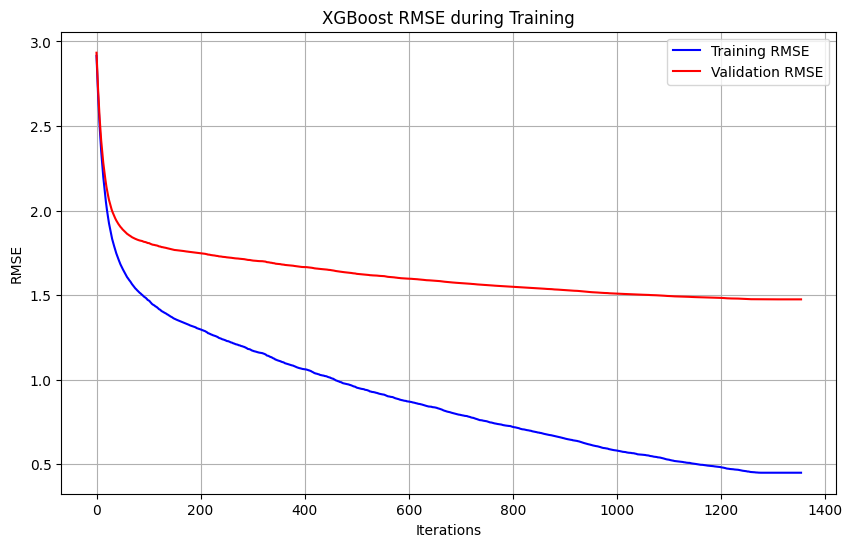

[CV 3/3; 9/10] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=5000, subsample=0.8;, score=-3.153 total time= 1.2min
[CV 2/3; 10/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=2000, subsample=0.6;, score=-3.535 total time=  36.1s
[CV 2/3; 9/10] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=5000, subsample=0.8;, score=-3.110 total time= 1.4min
[CV 3/3; 10/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=2000, subsample=0.6;, score=-3.559 total time=   9.0s


In [93]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [500, 1000, 2000, 5000],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Set up RandomizedSearchCV with 3-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1000,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # include both training and validation sets
    eval_metric="rmse",
    early_stopping_rounds=50,  # optional: stops training if no improvement
    verbose=1000  # to see training progress
)

# Best hyperparameters from the search
print(f"Best Parameters: {random_search.best_params_}")

# Best model after hyperparameter tuning
best_model = random_search.best_estimator_

# Evaluate the tuned model on the validation set
y_pred = best_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"XGBoost RMSE on validation set after tuning: {rmse:.4f}")

# Retrieve results from the best model's training process
results = best_model.evals_result()
epochs = len(results['validation_0']['rmse'])
training_rmse = results['validation_0']['rmse']
validation_rmse = results['validation_1']['rmse']

# Plot the evaluation metrics during training
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), training_rmse, label="Training RMSE", color='blue')
plt.plot(range(epochs), validation_rmse, label="Validation RMSE", color='red')
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.title("XGBoost RMSE during Training")
plt.legend()
plt.grid(True)
plt.show()


In [94]:

# Use .loc[] to select columns by name
test_selected = test_imputed.loc[:, selected_features.index]

test_selected.columns

Index(['bg-0:00', 'bg-0:15', 'bg-0:05', 'bg-0:30', 'hr-0:00', 'p_num',
       'bg-0:20', 'hour', 'insulin-0:25', 'cals-5:05', 'bg-0:50', 'bg-0:10',
       'insulin-0:35', 'insulin-0:30', 'bg-1:45', 'bg-4:55', 'hr-1:15',
       'bg-5:25', 'insulin-1:20', 'insulin-0:20', 'bg-3:10', 'insulin-0:15',
       'cals-1:00', 'bg-2:35', 'bg-3:25', 'insulin-0:10', 'insulin-5:30',
       'bg-1:10', 'insulin-5:25', 'bg-1:20', 'insulin-0:00', 'insulin-0:05',
       'insulin-4:45', 'insulin-0:45', 'hr-0:15', 'hr-0:10', 'cals-0:05',
       'insulin-0:40', 'cals-3:20', 'cals-1:25', 'hr-0:05', 'cals-1:15',
       'bg-2:50', 'hr-0:55', 'insulin-1:00', 'bg-3:15', 'hr-4:50', 'bg-1:50',
       'bg-2:00', 'cals-5:50', 'bg-4:50', 'bg-2:15', 'bg-5:15', 'cals-4:55',
       'insulin-1:15', 'cals-0:20', 'bg-1:35', 'bg-0:45', 'cals-5:00',
       'hr-0:45', 'bg-1:55', 'insulin-5:50', 'bg-2:40', 'hr-2:05',
       'insulin-0:50', 'bg-4:10', 'bg-3:05', 'insulin-1:40', 'cals-0:00',
       'bg-1:00', 'cals-4:20', 'hr-5:5

In [95]:
# Apply column selection based on prefixes for test data
bg_test = select_columns_by_prefix(test_selected, "bg-")
insulin_test = select_columns_by_prefix(test_selected, "insulin-")
hr_test = select_columns_by_prefix(test_selected, "hr-")
cals_test = select_columns_by_prefix(test_selected, "cals-")

# Convert each DataFrame to numpy arrays for test data
bg_test = bg_test.to_numpy()
insulin_test = insulin_test.to_numpy()
hr_test = hr_test.to_numpy()
cals_test = cals_test.to_numpy()



In [96]:

print("bg_test shape:", bg_test.shape)
print("insulin_val shape:", insulin_test.shape)
print("hr_test shape:", hr_test.shape)
print("cals_test shape:", cals_test.shape)

bg_test shape: (3644, 34)
insulin_val shape: (3644, 27)
hr_test shape: (3644, 14)
cals_test shape: (3644, 18)


In [97]:
# Transform each feature group for test data using already fitted transformers
bg_test = bg_transformer.transform(bg_test)
insulin_test = insulin_transformer.transform(insulin_test)
hr_test = hr_transformer.transform(hr_test)
cals_test = cals_transformer.transform(cals_test)

# Concatenate all transformed features for the test data
test = np.concatenate([bg_test, insulin_test, hr_test, cals_test], axis=1)

# Now X_test is ready for predictions
print("Shape of X_test:", test.shape)


Shape of X_test: (3644, 93)


In [98]:
# Make predictions on the test set (test_selected)
y_test_pred = xgb_model.predict(test)



In [101]:
import pandas as pd

# Assuming you have the 'id' column in your test DataFrame
submission_df = pd.DataFrame({
    'id': sample['id'],  # Make sure to replace 'test['id']' with the actual name of your ID column if different
    'bg+1:00': y_test_pred  # Change the column name to match your requirements
})

# Display the first few rows of the submission DataFrame
print(submission_df.head())

# Save to CSV
submission_df.to_csv('submission.csv', index=False)

         id   bg+1:00
0  p01_8459  9.167347
1  p01_8460  7.800807
2  p01_8461  8.505278
3  p01_8462  9.700572
4  p01_8463  7.263677


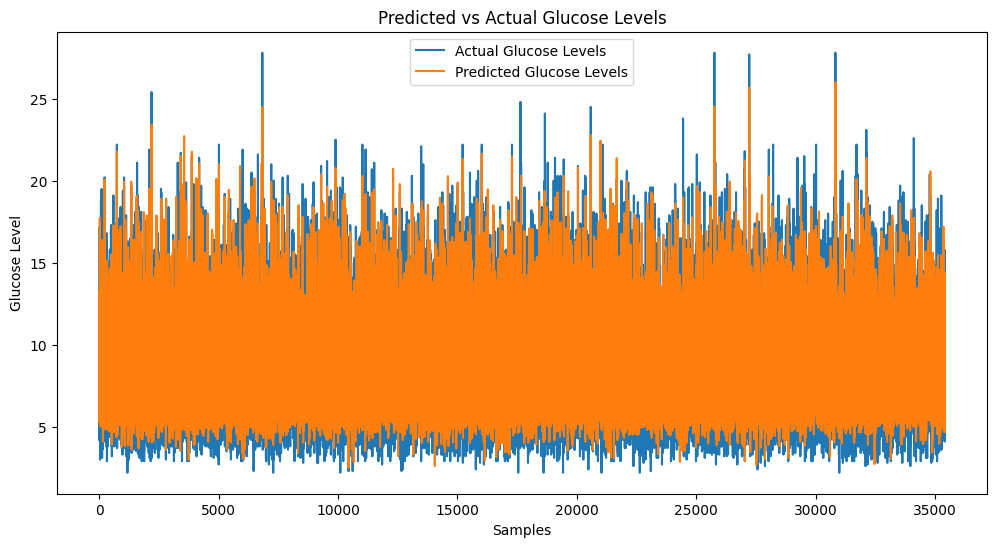

In [100]:
#Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_val.values, label='Actual Glucose Levels')
plt.plot(y_pred, label='Predicted Glucose Levels')
plt.xlabel('Samples')
plt.ylabel('Glucose Level')
plt.title('Predicted vs Actual Glucose Levels')
plt.legend()
plt.show()